In [19]:
import numpy as np
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riyos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# create the term frequency matrix
BookNames = pd.read_csv("BookNames.csv")['BookNames'].to_list()

all_terms = ['analysis', 'algebra', 'real', 'complex', 'graph', 'linear', 'theory', 'machine', 'learning', 'python', 'data', 'algorithm', 'structure', 'partial', 'differential', 'equations', 'programming', 'software', 'topology']

term_freq_matrix = pd.DataFrame(0, index=range(len(all_terms)), columns=BookNames)

for title in BookNames:
    terms = title.split()
    terms = [term.lower() for term in terms if term.lower() not in stopwords.words('english')]
    for term in terms:
        if term in all_terms:
            index = all_terms.index(term)
            term_freq_matrix.at[index, title] += 1

In [3]:
all_terms

['analysis',
 'algebra',
 'real',
 'complex',
 'graph',
 'linear',
 'theory',
 'machine',
 'learning',
 'python',
 'data',
 'algorithm',
 'structure',
 'partial',
 'differential',
 'equations',
 'programming',
 'software',
 'topology']

In [4]:
#SVD and dimension reduction 
k = 2
U, S, VT = np.linalg.svd(term_freq_matrix)

# Truncate the singular matrices
U_truncated = U[:, :k]
S_truncated = np.diag(S[:k])
VT_truncated = VT[:k, :]



In [6]:
#transforming the query into a query vector  
query = "deep learning"
query = query.lower().split()

print(query)

query_vector = np.zeros(len(all_terms))
counter = 0 
for term in query:
    if term.lower() in all_terms:
        index = all_terms.index(term)
        query_vector[index] += 1
        
query_vector = np.array(query_vector)
print(query_vector)
query_vector = query_vector.transpose() @ U_truncated @ np.linalg.inv(S_truncated)

        

['deep', 'learning']
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
#function to find angle between 2 functions
def ang(v1,v2):
    v1_norm = np.linalg.norm(v1)
    v2_norm = np.linalg.norm(v2)
    dot_product = np.dot(v1,v2)
    v = v1_norm*v2_norm
    if v != 0:
        cos_x =  cos_x = np.clip(dot_product / v, -1, 1)
    else:
        cos_x = 0
    angle = np.arccos(cos_x)
    return angle 

In [8]:
#find the closest vector to the query vector 
angles = []
for i in range(len(BookNames)):
    column = VT_truncated[:,i]
    angle = ang(query_vector,column)
    angles.append(angle)

BookNames[angles.index(min(angles))]

'Deep Learning'

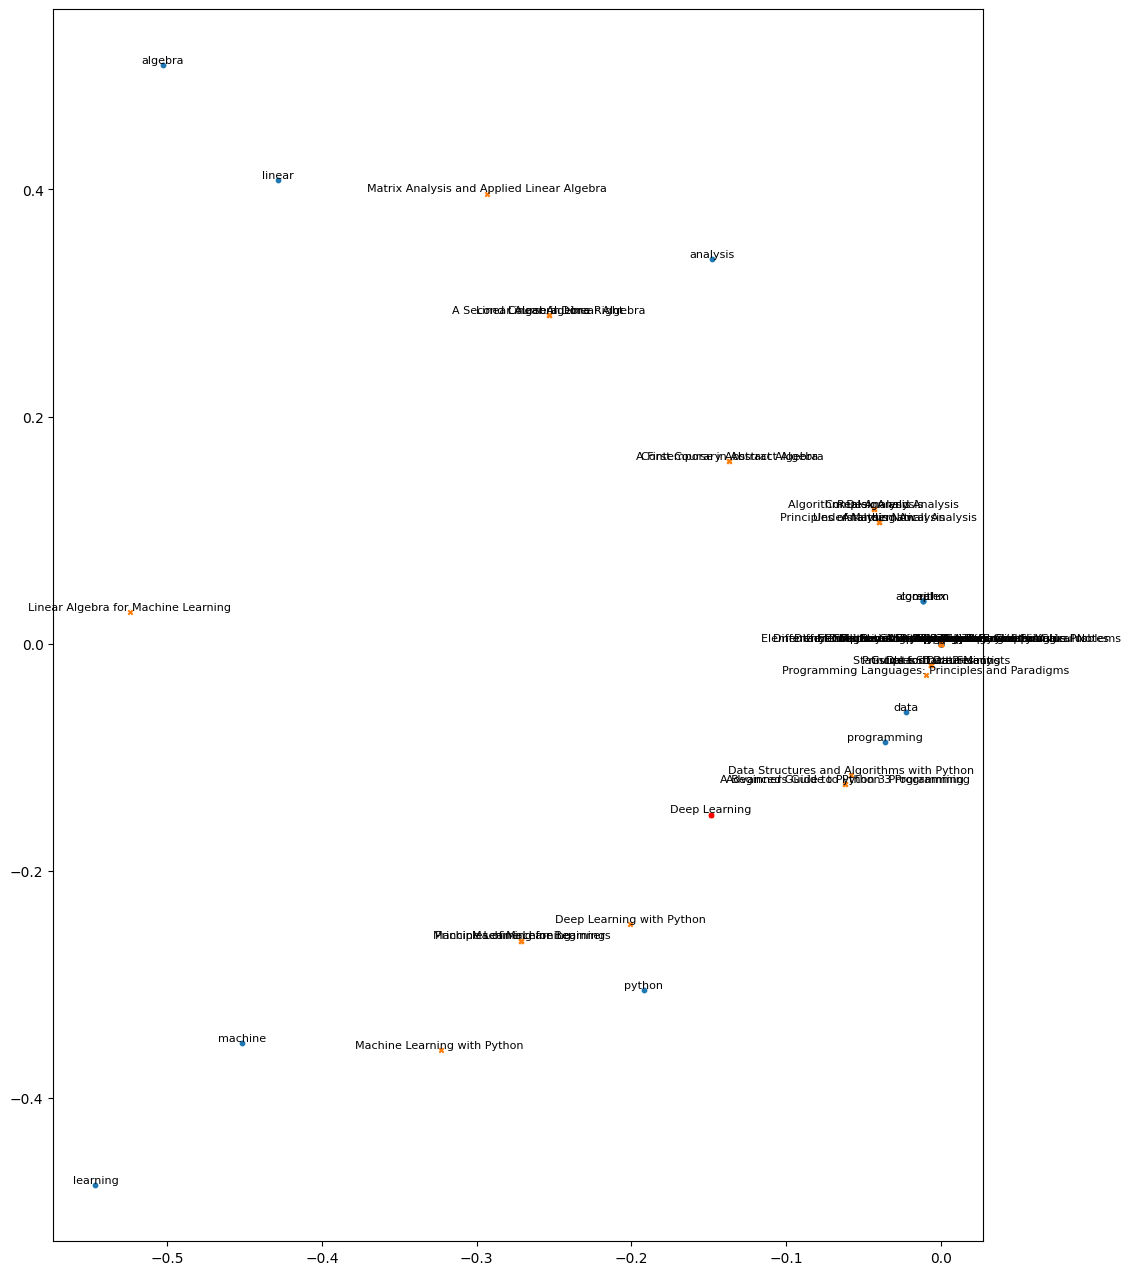

In [31]:

# Create a scatter plot representin the terms, documents and the query 
plt.figure(figsize=(12, 16))
plt.scatter(U_truncated[:, 0], U_truncated[:, 1], label='U_truncated', marker='o', s=10)
# Add labels to the data points
for i in range(len(U_truncated[:,0])):
    plt.annotate(all_terms[i], (U_truncated[:, 0][i], U_truncated[:, 1][i]), fontsize=8, ha='center', va='bottom')
plt.scatter(VT_truncated[0, :], VT_truncated[1, :], label='VT_truncated', marker='x', s=10)
for i in range(len(VT_truncated[0,:])):    
    plt.annotate(BookNames[i],(VT_truncated[0,:][i], VT_truncated[1,:][i]), fontsize=8, ha='center', va='bottom')
plt.scatter(query_vector[0], query_vector[1], label='query', marker='o', s=10, color = 'red')


C:\Users\riyos\AppData\Local\Temp\ipykernel_29924\633512138.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(all_terms[i], (U_truncated[:, 0][i], U_truncated[:, 1][i]), textcoords='offset points',


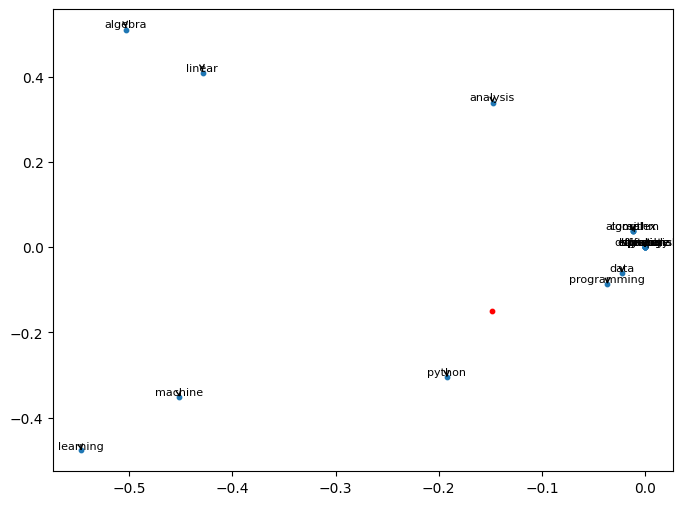

In [30]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(U_truncated[:, 0], U_truncated[:, 1], label='U_truncated', marker='o', s=10)
# Add labels to the data points
for i in range(len(U_truncated[:,0])):
    plt.annotate(all_terms[i], (U_truncated[:, 0][i], U_truncated[:, 1][i]), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->'), fontsize=8, ha='center', va='bottom')
plt.scatter(query_vector[0], query_vector[1], label='query', marker='o', s=10, color = 'red')

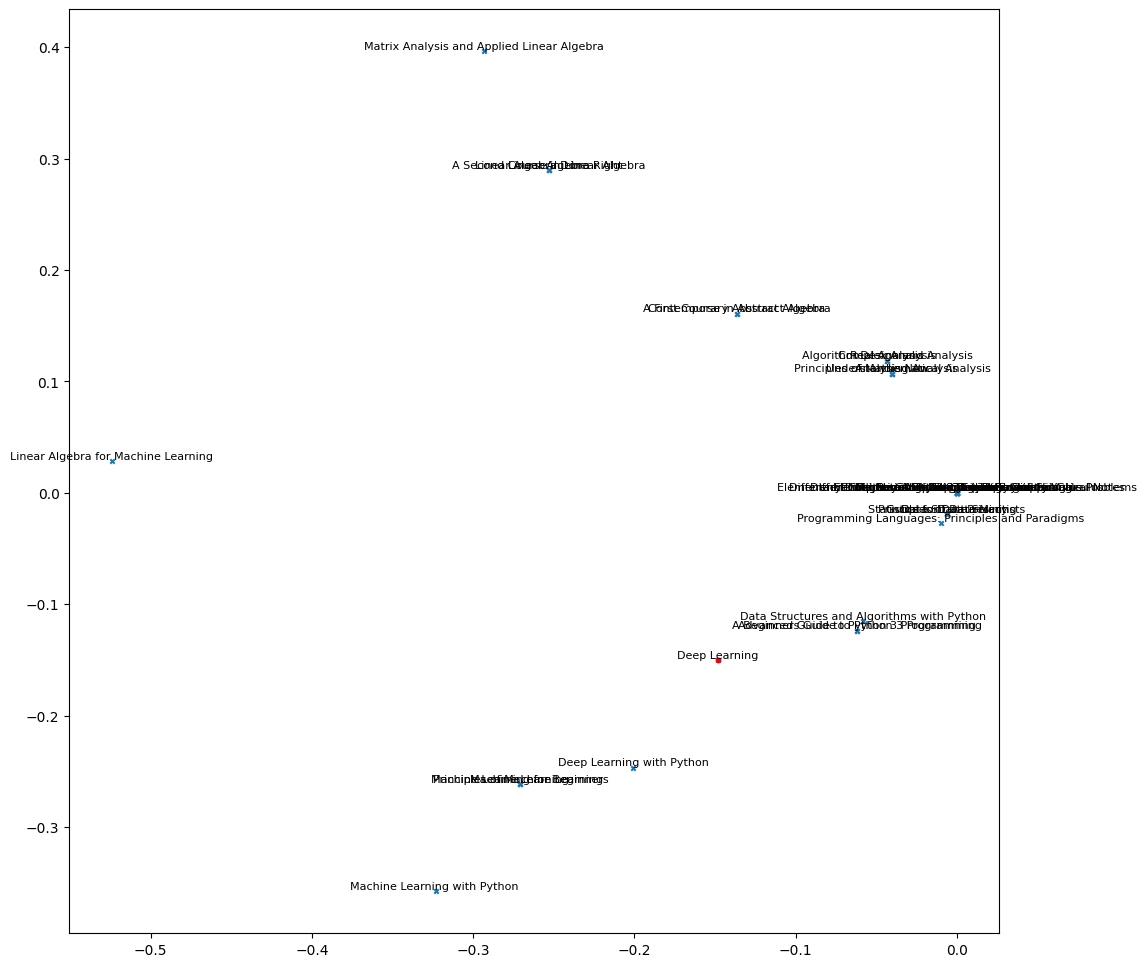

In [32]:
# Create a scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(VT_truncated[0, :], VT_truncated[1, :], label='VT_truncated', marker='x', s=10)
for i in range(len(VT_truncated[0,:])):    
    plt.annotate(BookNames[i],(VT_truncated[0,:][i], VT_truncated[1,:][i]), fontsize=8, ha='center', va='bottom')
plt.scatter(query_vector[0], query_vector[1], label='query', marker='o', s=10, color = 'red')
